ФБ-22 Копилов Сергій

Лабораторна робота №6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Завдання 1

In [2]:
k = 12
b = 7
n = 500

x = np.random.randn(n)
x = np.linspace(0, 10, n)

y = k * x + b + np.random.normal(0, 5, n)

print("x:", x)
print("y:", y)

x: [ 0.          0.02004008  0.04008016  0.06012024  0.08016032  0.1002004
  0.12024048  0.14028056  0.16032064  0.18036072  0.2004008   0.22044088
  0.24048096  0.26052104  0.28056112  0.3006012   0.32064128  0.34068136
  0.36072144  0.38076152  0.4008016   0.42084168  0.44088176  0.46092184
  0.48096192  0.501002    0.52104208  0.54108216  0.56112224  0.58116232
  0.6012024   0.62124248  0.64128257  0.66132265  0.68136273  0.70140281
  0.72144289  0.74148297  0.76152305  0.78156313  0.80160321  0.82164329
  0.84168337  0.86172345  0.88176353  0.90180361  0.92184369  0.94188377
  0.96192385  0.98196393  1.00200401  1.02204409  1.04208417  1.06212425
  1.08216433  1.10220441  1.12224449  1.14228457  1.16232465  1.18236473
  1.20240481  1.22244489  1.24248497  1.26252505  1.28256513  1.30260521
  1.32264529  1.34268537  1.36272545  1.38276553  1.40280561  1.42284569
  1.44288577  1.46292585  1.48296593  1.50300601  1.52304609  1.54308617
  1.56312625  1.58316633  1.60320641  1.62324649 

In [3]:
def sq(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    sum1 = ((x-mean_x)*(y-mean_y)).sum()
    for i, j in zip(x, y):
        sum1 += (i-mean_x)*(j-mean_y)
    
        
    sum2 = ((x-mean_x)**2).sum()
    for i in x:
        sum2 += (i-mean_x)**2

    b1 = sum1/sum2
    b0 = mean_y - mean_x*b1

    return b1, b0

b1, b0 = sq(x, y)
print(b1)
print(b0)

11.98461137404996
7.050041501958653


In [4]:
args = np.polyfit(x,y,1)
print(args)

[11.98461137  7.0500415 ]


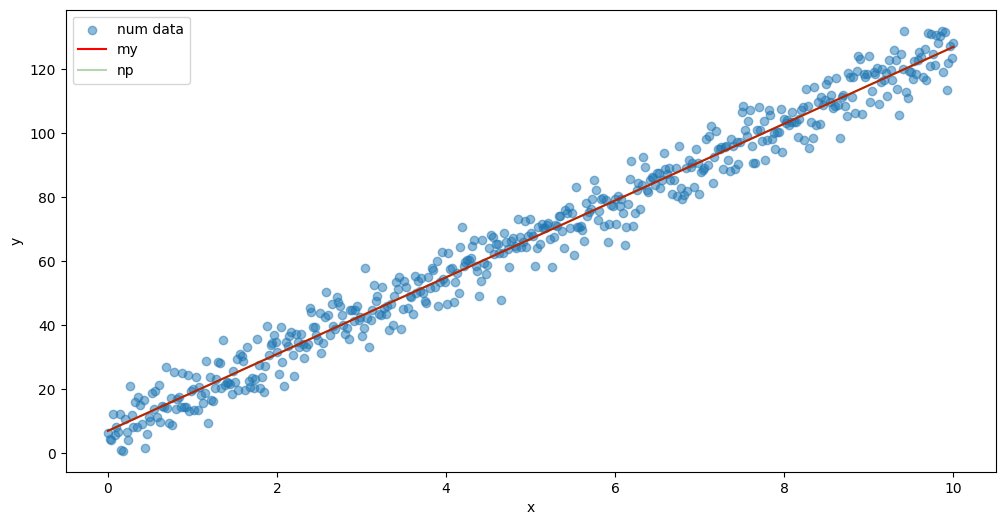

In [5]:
plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.5, label='num data')

plt.plot(x, b1*x + b0, color='red', label='my')
plt.plot(x, args[0]*x+args[1], alpha=0.3, color='green', label='np')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

Завдання 2

In [6]:
def MSE (b0, b1):
    global n
    sum = ((y-b0-b1*x)**2).sum()
    for i, j in zip(x, y):
        sum += (j-b0-b1*i)**2
    
    return sum/n

def gradient_descent(x, y, learning_rate=0.01, n_iter=500, e=0):
    k = 0  
    b = 0  
    m = len(x)
    
    k_history = []
    b_history = []
    mse_history = []
    
    for i in range(n_iter):
        y_pred = k * x + b


        gradient_b = (-2/m) * np.sum(y - y_pred)
        gradient_k = (-2/m) * np.sum(x * (y - y_pred))
        
        b -= learning_rate * gradient_b
        k -= learning_rate * gradient_k
        
        mse_history.append(MSE(b, k))  
        k_history.append(k)
        b_history.append(b)
        if e != 0 and len(mse_history)>=2:
            if abs(mse_history[-1] - mse_history[-2]) <= e:
                break
    
    return k_history, b_history, mse_history


print(f"k = {k}, b = {b}")
gk, gb, mse = gradient_descent(x, y,)
gk = gk[-1]
gb = gb[-1]
print(f"grad_k = {gk}, grad_b = {gb}")

k = 12, b = 7
grad_k = 12.050825221842956, grad_b = 6.6114207190004715


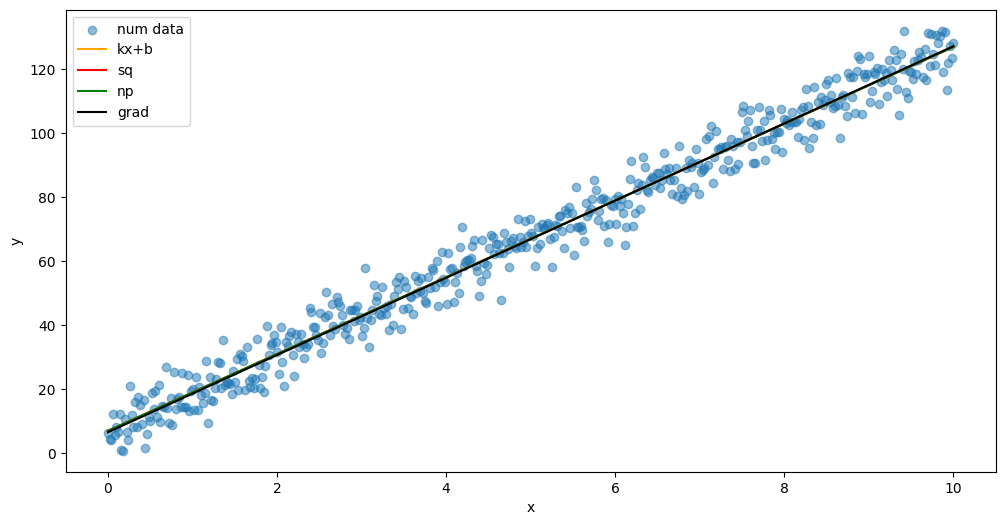

kx+b: 54.80443083543973
sq: 54.7079320682327
np: 54.70793206823269
grab: 54.80443083543973


In [7]:
plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.5, label='num data')


plt.plot(x, k*x + b, color='orange', label='kx+b')
plt.plot(x, b1*x + b0, color='red', label='sq')
plt.plot(x, args[0]*x+args[1], color='green', label='np')

k, b, mse = gradient_descent(x, y,)
k = k[-1]
b = b[-1]
plt.plot(x, gk*x+gb, color='black', label='grad')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print(f"kx+b: {MSE(b, k)}")
print(f"sq: {MSE(b0, b1)}")
print(f"np: {MSE(args[1], args[0])}")
print(f"grab: {MSE(gb, gk)}")

MSE with k  &  b: 54.80443083543973
MSE with b1 & b0: 54.7079320682327


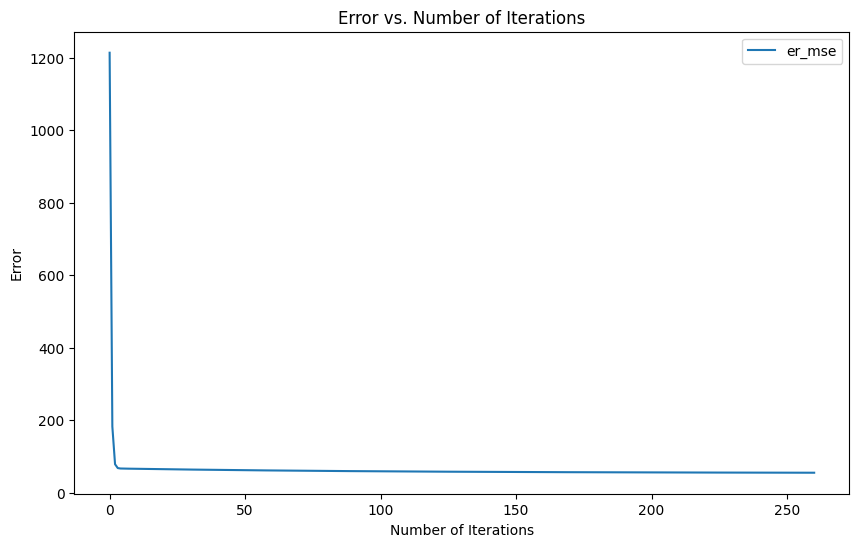

In [8]:
print(f"MSE with k  &  b: {MSE(b, k)}")
print(f"MSE with b1 & b0: {MSE(b0, b1)}")

n = 500
k_hist, b_hist, mse_hist = gradient_descent(x, y, n_iter=n, e=0.01)
iters = np.arange(len(mse_hist))



plt.figure(figsize=(10, 6))
plt.plot(iters, mse_hist, label='er_mse')

plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Number of Iterations')
plt.legend()
plt.show()